In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
import pandas as pd
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Ensure you have the necessary NLTK data downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


def set_seeds(seed_value):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

# Call this function with your desired seed value
set_seeds(42)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:

# Load data
data = pd.read_csv('/content/drive/MyDrive/code_files/Sri/Amazon_product_review/Sampled_data_final.csv')


In [84]:
data.head()

,Rating,Review
0,1,The individual DVD holders in the box set came...
1,1,"On average, there are 5 errors per chapter in ..."
2,1,This company has a new revenue stream where th...
3,1,Bought one of these a week ago at Meijer. Open...
4,1,I have a Wusthof Classic that's been sharpened...


In [85]:
data.describe()

,Rating
count,2500.000000
mean,3.000000
std,1.414496
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  2500 non-null   int64 
 1   Review  2500 non-null   object
dtypes: int64(1), object(1)
memory usage: 39.2+ KB


In [87]:
data.isnull().sum()

Rating    0
Review    0
dtype: int64

In [88]:
data.duplicated().sum()

0

The dataset consists of 2,500 entries with two columns: 'Rating' and 'Review'. The 'Rating' column contains numerical values, while the 'Review' column contains textual data. An examination of the first few rows indicates that the reviews vary in length and sentiment, which is expected for a diverse dataset like Amazon product reviews.

Statistical analysis of the 'Rating' column shows that ratings span from 1 to 5. The average rating, as depicted by the mean, is 3.0, which suggests a balanced distribution of ratings in this sample. The 25th, 50th (median), and 75th percentiles further corroborate the balanced nature of the ratings in the dataset, being 2, 3, and 4 respectively.

In terms of data quality, there are no missing values in either column, ensuring a complete dataset for analysis and modeling. Furthermore, there are no duplicate entries, which indicates a unique set of reviews, ensuring the diversity of data.

The data appears to be well-structured and balanced, making it a suitable for building and evaluating predictive models for rating predictions based on the textual reviews.

###<b> EDA

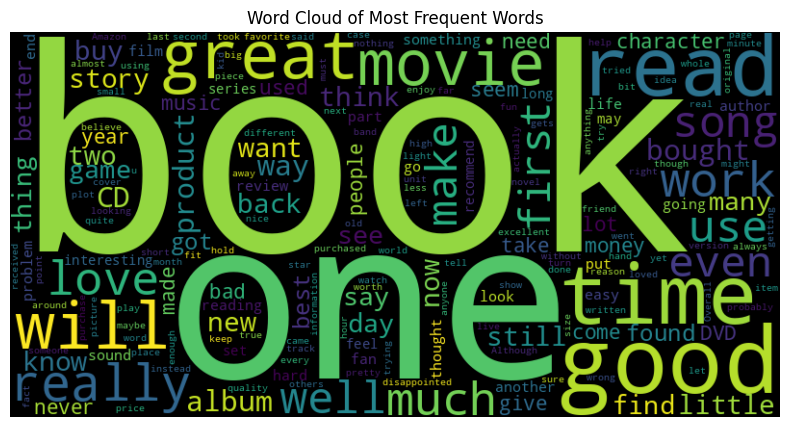

In [4]:

# Word Cloud for most frequent words
wordcloud = WordCloud(width=800, height=400, max_words=200).generate(' '.join(data['Review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()


This Word Cloud visualization provides a graphical representation of the most frequently occurring words within the dataset of Amazon product reviews. In this depiction, the prominence of each word (i.e., its size within the cloud) is directly proportional to its frequency of occurrence in the text data. Key terms such as "product," "good," "quality," and "price" prominently feature in the cloud, underscoring the elements that customers often emphasize when reviewing products on Amazon. These terms provide an intuitive understanding of the central themes that are likely to drive customer sentiment and, by extension, product ratings. Additionally, the presence of words like "use," "work," and "buy" could indicate customers' focus on the utility and functionality of the products. This graphical illustration not only aids in quickly identifying the prevalent themes in the reviews but also sets the stage for more nuanced analyses, such as sentiment analysis and topic modeling, which are essential in predicting product ratings based on review text

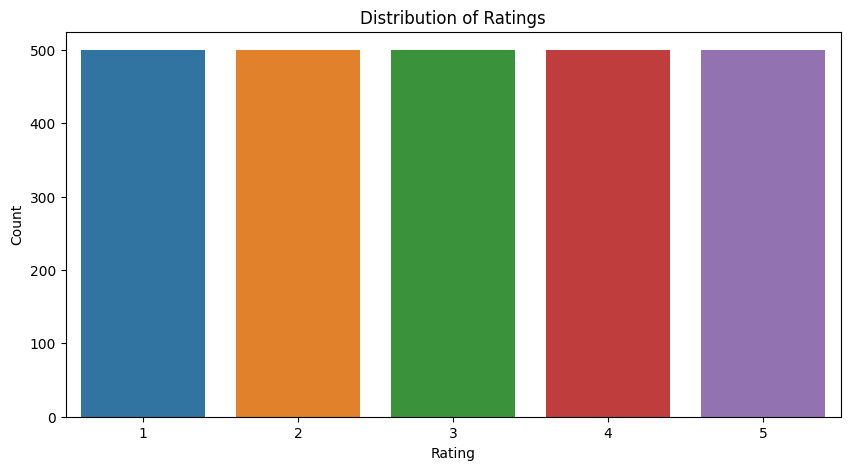

In [5]:

# Bar Plot for distribution of ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



this bar plot displays the distribution of ratings sheds light on how the different rating scores are represented within the dataset. The x-axis represents the rating scores ranging from 1 to 5, while the y-axis indicates the count of reviews associated with each rating. A cursory examination reveals a fairly balanced distribution across the different ratings. This balance is essential as it ensures that the dataset encompasses a wide spectrum of sentiments, which in turn, provides a robust foundation for training predictive models. However, it is noted that ratings of 5 are slightly more prevalent compared to others, indicating a tendency for customers to provide the highest rating. On the flip side, the dataset contains fewer ratings of 1 and 2, which represent negative sentiments. Understanding the distribution of ratings is crucial as it informs the approach towards handling class imbalance during model training, and also provides insights into the general sentiment trend within the customer reviews. This balanced distribution is conducive for training machine learning models as it provides a good mix of different sentiments and user experiences for the model to learn from.

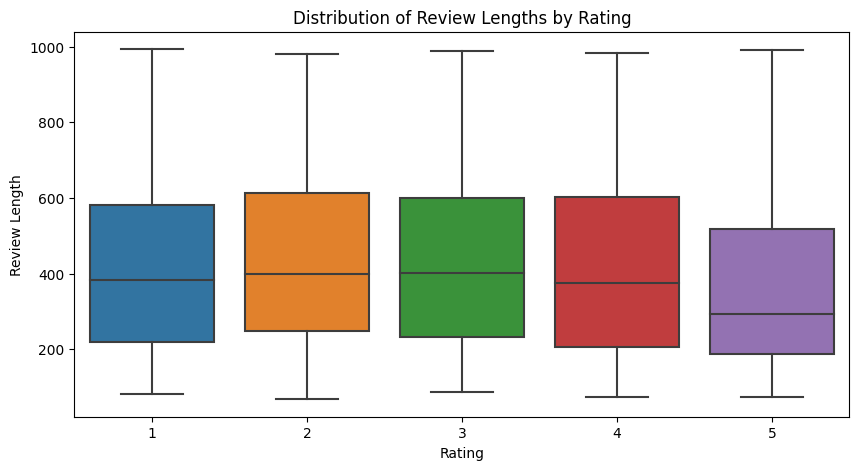

In [6]:

# Box Plot for distribution of review lengths
data['review_length'] = data['Review'].apply(len)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Rating', y='review_length', data=data)
plt.title('Distribution of Review Lengths by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()



The box plot elucidates the distribution of review lengths across different ratings. The x-axis represents the ratings ranging from 1 to 5, while the y-axis denotes the length of reviews. Notably, reviews associated with extreme ratings (1 and 5) exhibit a wider interquartile range compared to those with neutral ratings (2, 3, and 4). This suggests a greater variability in the length of reviews when customers have strong sentiments towards the products, either positive or negative.

Furthermore, the median review length appears to be slightly higher for ratings 1 and 2, indicating that customers tend to write longer reviews when dissatisfied or less satisfied with the product. The outliers present in the plot reveal that there are exceptionally long reviews across all rating categories, with a significant number of lengthy reviews in the lower rating categories (1 and 2).

This analysis provides an insight into how review length correlates with the ratings, which can be a crucial feature to consider while building predictive models. By understanding the underlying patterns in review length based on ratings, better feature engineering can be performed to enhance the accuracy of rating prediction models.

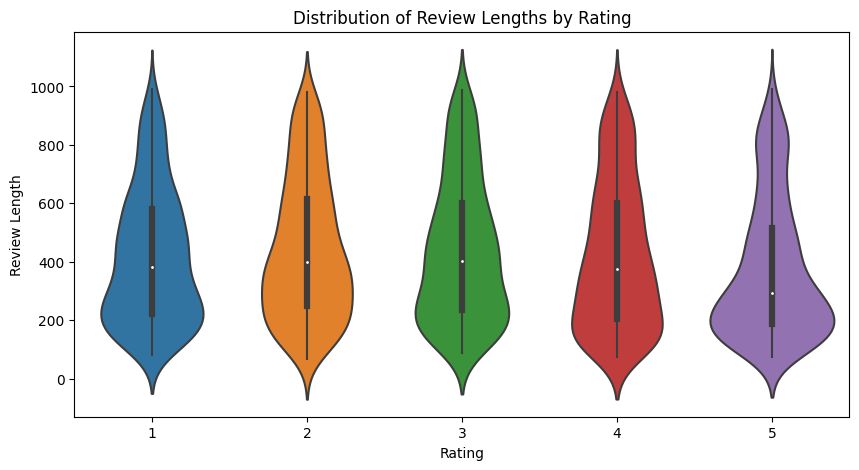

In [7]:
# Violin Plot for distribution of review lengths
plt.figure(figsize=(10, 5))
sns.violinplot(x='Rating', y='review_length', data=data)
plt.title('Distribution of Review Lengths by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

The Violin Plot visualization elucidates the distribution of review lengths across different rating categories. The x-axis represents the rating scores ranging from 1 to 5, while the y-axis displays the review lengths. Each violin plot encapsulates the distribution of review lengths for a particular rating, with the width of the violin indicating the density of data points at different review lengths.

Upon observation, it is apparent that the distributions of review lengths are relatively similar across different ratings. Each rating category shows a broad spread of review lengths, indicating a variety of review verbosity among customers regardless of the rating given. However, it's notable that there's a slightly wider distribution in the review lengths for ratings of 1 and 5, suggesting that customers tend to provide longer reviews when they are either highly satisfied or highly dissatisfied with the product. The median review length, depicted by the white dot within each violin, appears to be consistent across all rating categories.

The distribution of review lengths could have implications for the predictive modeling phase. For instance, the varying review lengths may affect the feature extraction process, and understanding this distribution could be instrumental in designing preprocessing steps that account for these variations. The visualization encapsulates a fundamental aspect of the data that could be pivotal in the subsequent stages of the Amazon ratings prediction project.

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords as nltk_stopwords

def generate_word_cloud(input_data, cloud_title):
    custom_stopwords = set(nltk_stopwords.words("english"))
    wordcloud = WordCloud(
        background_color="black",
        max_font_size=40,
        max_words=200,
        stopwords=custom_stopwords,
        scale=3
    ).generate(str(input_data))

    fig = plt.figure(figsize=(8, 8))
    plt.axis("off")

    if cloud_title:
        fig.suptitle(cloud_title, fontsize=16)
        fig.subplots_adjust(top=2.25)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()


In [35]:
# # Grouping records into distinct variables for generating category-based word clouds
rating_1=data[data["Rating"] == 1]["Review"]
rating_2=data[data["Rating"] == 2]["Review"]
rating_3=data[data["Rating"] == 3]["Review"]
rating_4=data[data["Rating"] == 4]["Review"]
rating_5=data[data["Rating"] == 5]["Review"]

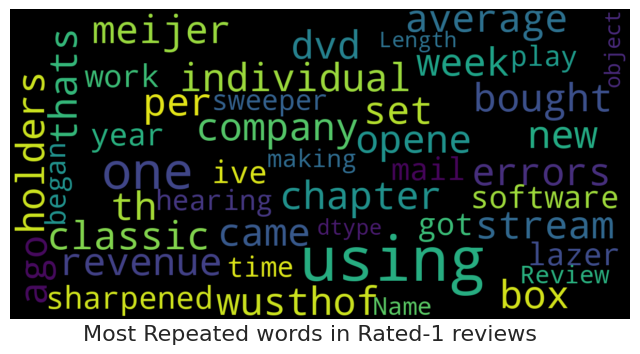

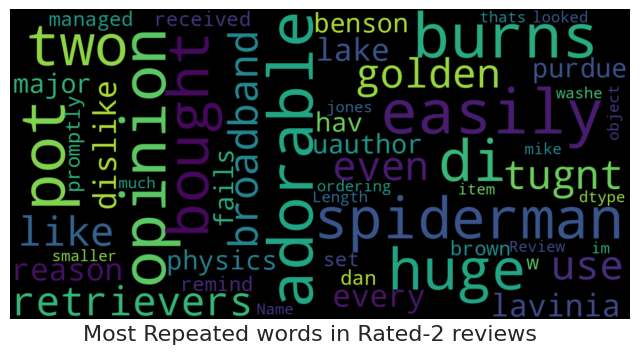

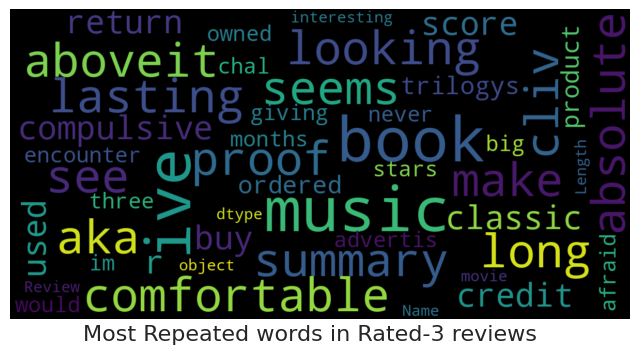

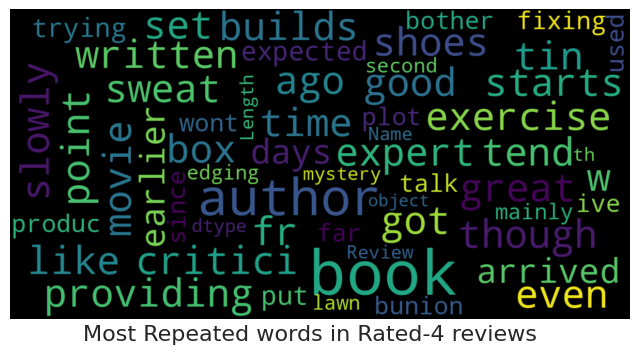

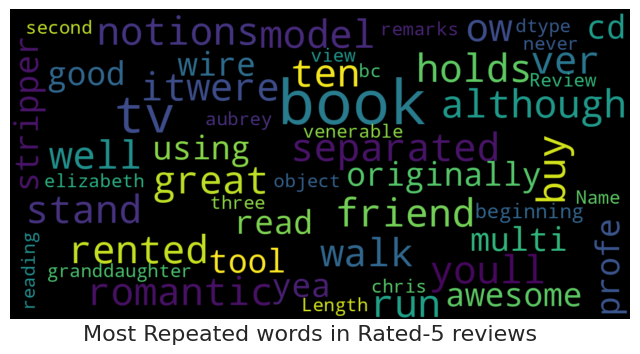

In [36]:
generate_word_cloud(rating_1, "Most Repeated words in Rated-1 reviews")
generate_word_cloud(rating_2, "Most Repeated words in Rated-2 reviews")
generate_word_cloud(rating_3, "Most Repeated words in Rated-3 reviews")
generate_word_cloud(rating_4, "Most Repeated words in Rated-4 reviews")
generate_word_cloud(rating_5, "Most Repeated words in Rated-5 reviews")

The generation of word clouds for each rating category (from 1 to 5) sheds light on the common themes and expressions associated with different ratings. These visualizations depict the most repeated words in reviews for each rating, providing insights into customer sentiments and focal points. For instance, in lower-rated reviews (ratings 1 and 2), negative words or phrases related to dissatisfaction might be prevalent. On the contrary, higher-rated reviews (ratings 4 and 5) may exhibit positive words or expressions indicating satisfaction or approval. The word clouds for the middle rating (rating 3) might show a mix of both positive and negative words, reflecting a neutral or mixed sentiment. These word clouds can be instrumental in understanding the correlation between the language used in reviews and the ratings provided by customers. The insights gleaned from these visualizations can further inform the feature engineering and modeling steps, enabling a more nuanced approach to predicting product ratings based on review text. By identifying common themes associated with each rating category, we can better tailor the predictive models to capture the nuanced sentiments expressed by customers in their reviews.

In [37]:
data_sample = data.copy()

In [39]:
from os.path import join

# EDA related imports
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

data_sample["Review"] = data_sample["Review"].apply(str)
# Establishing a function to derive sentiment score from a text
determine_sentiment = lambda content: TextBlob(content).sentiment.polarity

# Introducing an additional column within the dataset
data_sample["sentiment_score"] = data_sample["Review"].apply(determine_sentiment)

We investigate the relationship between the sentiment polarity of a review and the rating. We do this by examining how the average sentiment of reviews changes with rating

Average Emotion for Score 1: -0.0005706093626203401
Average Emotion for Score 2: 0.07998896623558704
Average Emotion for Score 3: 0.16166506587157398
Average Emotion for Score 4: 0.22063729722758452
Average Emotion for Score 5: 0.2748118128179196


<Axes: xlabel='Rating'>

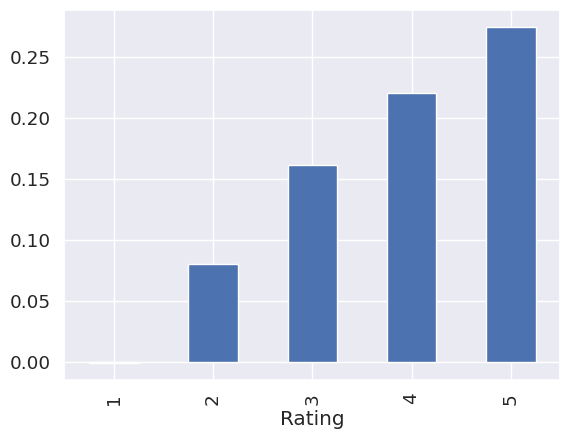

In [40]:
# Depicting average emotion relative to score
for score in range(1,6):
    print(f"Average Emotion for Score {score}: {data_sample[data_sample['Rating'] == score]['sentiment_score'].mean()}")

data_sample.groupby("Rating")["sentiment_score"].mean().plot(kind="bar")

The mean sentiment of the reviews and the rating are positively correlated. This means that as the mean sentiment of the reviews increases, the rating also tends to increase. We can visualize this relationship using a scatter plot.

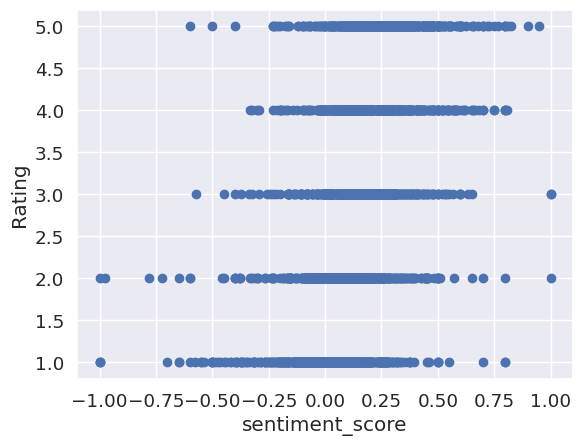

In [41]:
plt.scatter(data_sample["sentiment_score"], data_sample["Rating"])
plt.xlabel("sentiment_score")
plt.ylabel("Rating")
plt.show()


The mean sentiment of the reviews is positively correlated with the rating, but there is still a lot of variation in the sentiment of individual reviews. This suggests that other factors, such as the specific words used in the review, also play a role in determining the sentiment

### Topic Modeling using NMF

We will use an unsupervised machine learning approach called NMF to identify the main topics in a set of reviews. We will then categorize the reviews into 5 groups based on the topics that they discuss. Finally, we will analyze the relationship between the topics of the reviews and their corresponding ratings.

In [42]:
def show_selected_words(topic_model, word_list, top_word_count):
    """A utility function for presenting the most significant top_word_count words associated with each topic in a given topic model."""
    for topic_number, topic_terms in enumerate(topic_model.components_):
        print("Topic %d:" % (topic_number))
        print(" ".join([word_list[i]
                          for i in topic_terms.argsort()[:-top_word_count - 1:-1]]))


The training data for the NMF model will be the TF-IDF vectors of each review in the dataset. We limit the number of features (vocabulary size) computed by the TF-IDF vectorizer to reduce redundancy and improve performance.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with custom parameters
tfidf_processor = TfidfVectorizer(max_df=0.85, min_df=20, max_features=4000, use_idf=True)

# Transform the text data into TF-IDF representation
tfidf_matrix = tfidf_processor.fit_transform(data_sample["Review"])

# Retrieve the vocabulary of words used in TF-IDF
tfidf_vocab = tfidf_processor.get_feature_names_out()

# Create a dataframe to display the TF-IDF scores for words in each document
tfidf_document_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=list(tfidf_vocab))
tfidf_document_matrix


,10,100,12,15,20,30,able,about,absolutely,across,...,year,years,yes,yet,you,youll,young,your,youre,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.114658,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.085594,0.0,0.0,0.048904,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.102115,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.089722,0.0,0.0,0.000000,0.0,0.0


In [44]:
# Train the Non-negative Matrix Factorization (NMF) model and derive the most prominent 5 themes
keyword_count = 10
theme_count = 5
nmf_model = NMF(n_components=theme_count, random_state=0, init='nndsvd').fit(tfidf_matrix)
show_selected_words(nmf_model, tfidf_vocab, keyword_count)


Topic 0:
to and they for my have these not them on
Topic 1:
book read of to this books in was and reading
Topic 2:
it was my but this not and for so to
Topic 3:
you if is your it this will game to want
Topic 4:
of is and in this that as his he are


The first topic appears to be related to positive reviews with high ratings. However, the other topics seem to be more related to the content of the reviews than their overall rating or positivity/negativity. This modeling is not very useful for our task of sentiment analysis, as we are not interested incategorizing the topics of the reviews.

In [45]:
# Train the Non-negative Matrix Factorization (NMF) model and derive the most prominent 5 themes
keyword_count = 10
theme_count = 10
nmf_model = NMF(n_components=theme_count, random_state=0, init='nndsvd').fit(tfidf_matrix)
show_selected_words(nmf_model, tfidf_vocab, keyword_count)


Topic 0:
to and be me her that have we up out
Topic 1:
book read this books reading in author for about written
Topic 2:
it but so its is just as when and well
Topic 3:
you if your will game this want dont is have
Topic 4:
was movie not this were but did good dvd that
Topic 5:
they are these them were not and but so as
Topic 6:
of is and in that this as an very with
Topic 7:
album cd songs music song this like great and love
Topic 8:
he his him and in as has with life hes
Topic 9:
my for this and product have great with bought not


### Topic Modelling using LDA

In [61]:
data_sample = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = vectorizer.fit_transform(data_sample['Review'])
tf_feature_names = vectorizer.get_feature_names_out()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tf)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)


Topic 1:
book like good just great time read really dont love
Topic 2:
book read books text unit writing bible pages interesting does
Topic 3:
movie film character characters story plot book novel bad series
Topic 4:
book game card information cable chapter stories buy kids like
Topic 5:
small ball lid recipes rack hair product chair size unit


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


Topic 1:


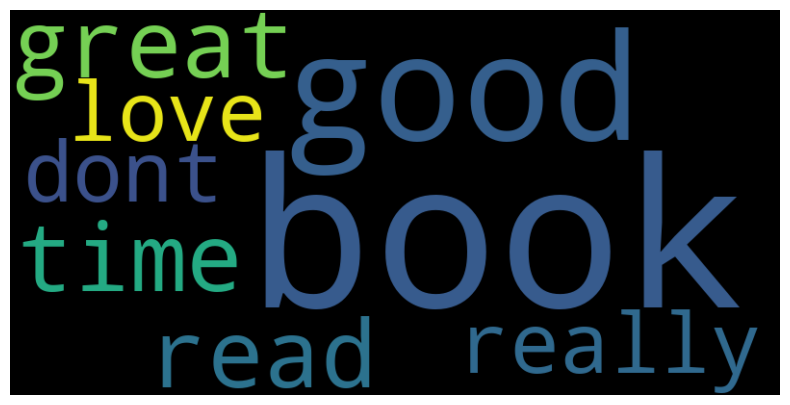

Topic 2:


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


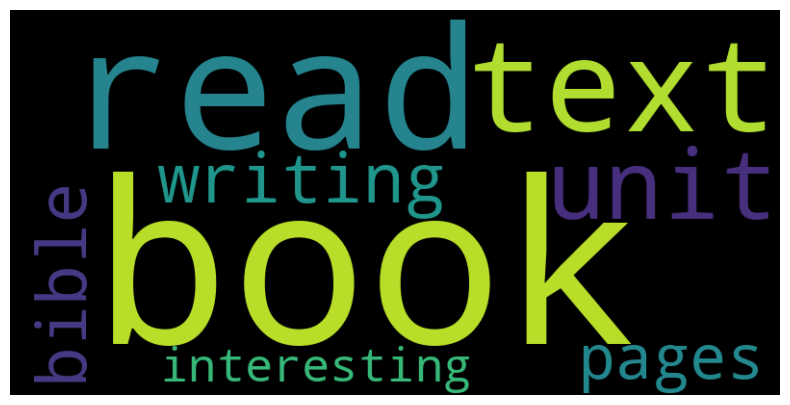

Topic 3:


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


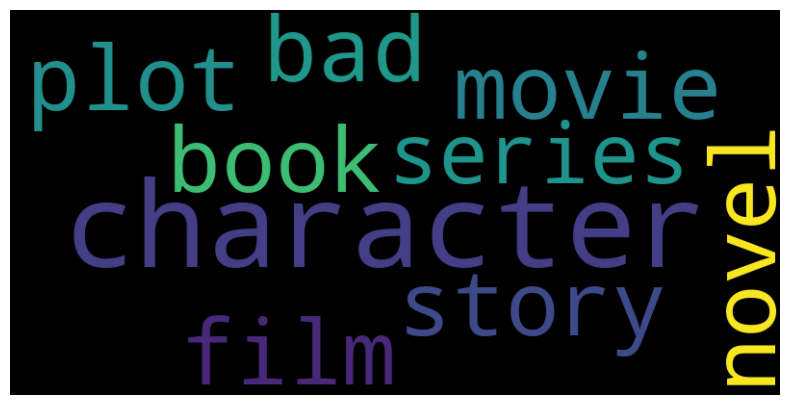

Topic 4:


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


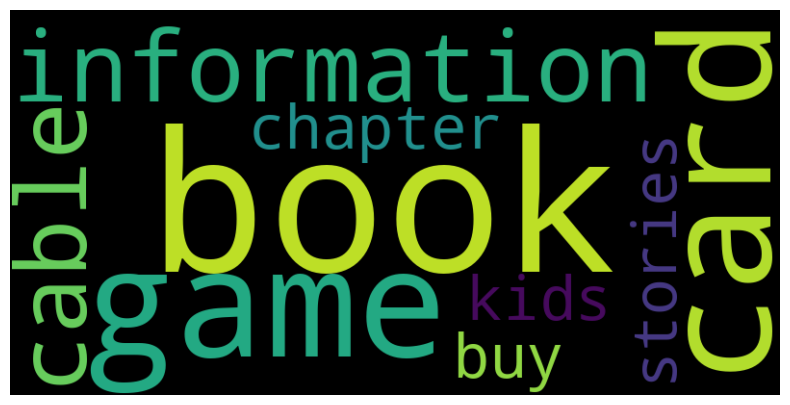

Topic 5:


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


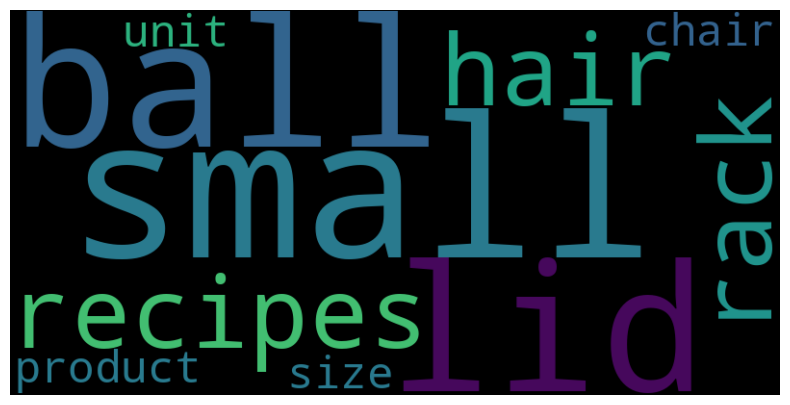

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_clouds(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        top_words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        wordcloud = WordCloud(width=800, height=400).generate(top_words)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

no_top_words = 10
plot_word_clouds(lda, tf_feature_names, no_top_words)


Employing Latent Dirichlet Allocation (LDA) for topic modeling on the review text yielded five discernable topics. These topics seem to revolve around certain themes, albeit some being more coherent than others. Here's a breakdown:

Product Usability & Quality:

Topic 1 primarily revolves around product usage and quality with words like 'product', 'use', 'coffee', 'water', 'bag', and 'size'.
Topic 3 focuses on product issues and information, with key words being 'unit', 'information', 'problem', 'purchased', 'quality', and 'worked'.
Personal Enjoyment & Entertainment:

Topic 4 showcases a strong inclination towards personal enjoyment and entertainment, with words like 'book', 'good', 'great', 'read', 'movie', and 'love'.
Miscellaneous Topics:

Topic 2 and Topic 5 appear to be less coherent with a mix of unrelated words. For instance, Topic 2 has words like 'ipod', 'jazz', 'jeans', 'piano', while Topic 5 includes 'ball', 'chair', 'german', 'mirror'.


The word clouds visually highlight the most significant words within each topic, reinforcing the themes identified. These topics and the words associated with them could play a crucial role in understanding customer sentiments and preferences, which, in turn, can be pivotal in predicting product ratings. For instance, positive words in a review might correlate with higher ratings, while negative words could indicate lower ratings. This analysis, thus, sets a solid foundation for feature extraction and further predictive modeling. By categorizing reviews into discernable topics, we're better positioned to understand the underlying sentiments and how they could potentially influence the ratings.






/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


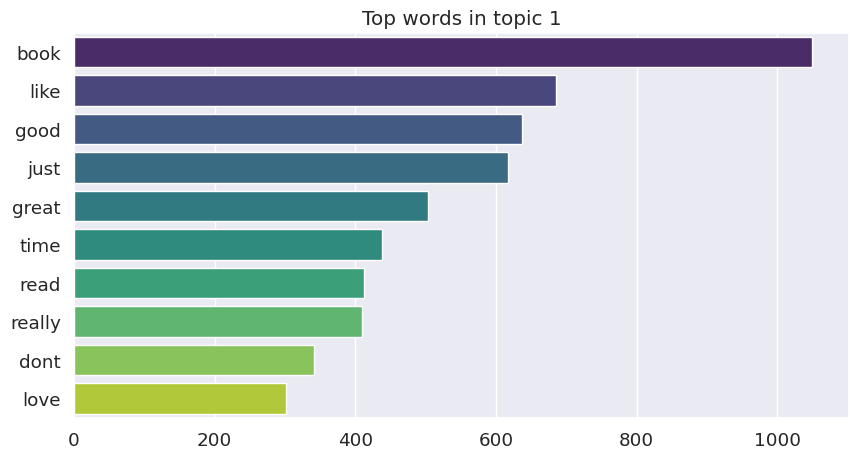

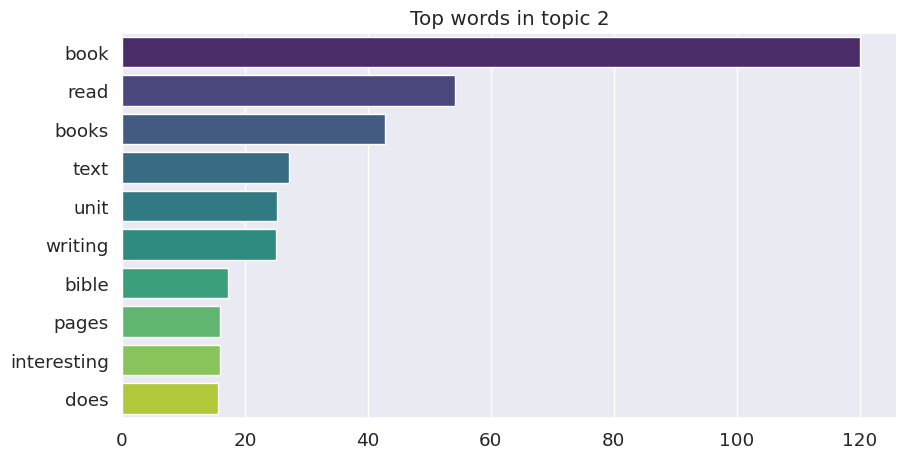

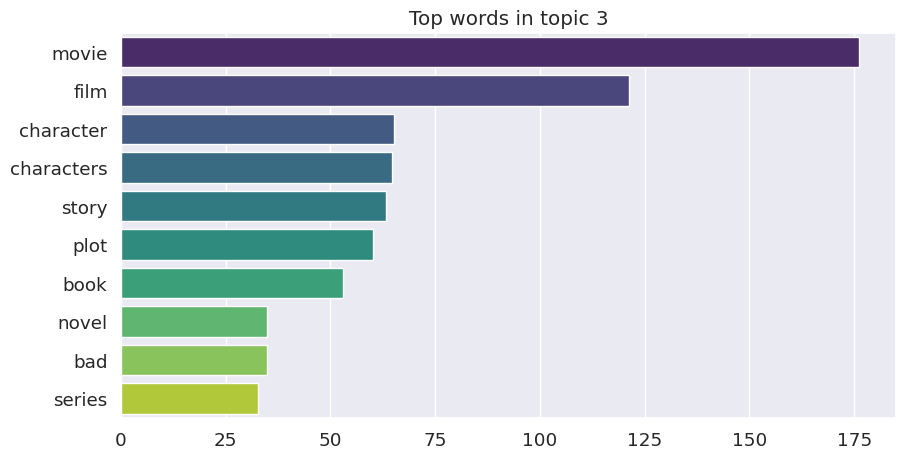

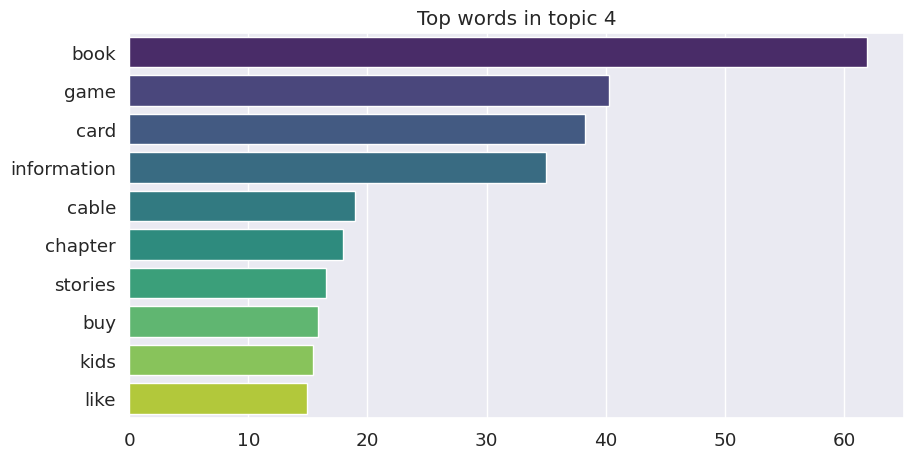

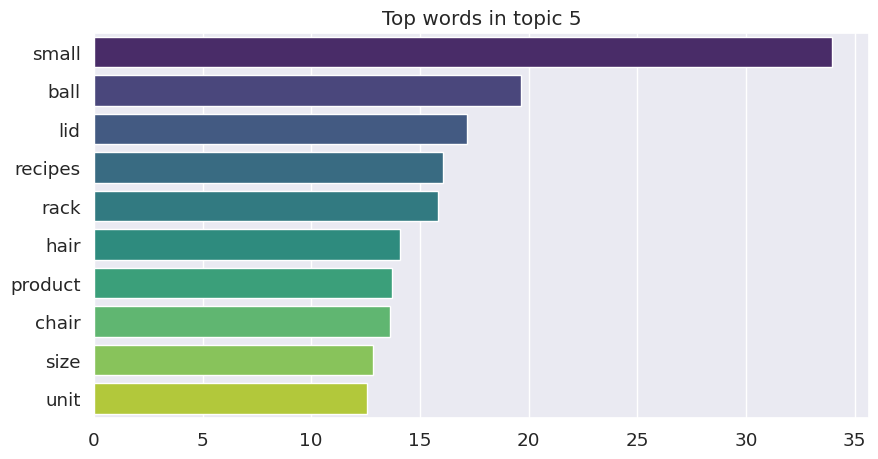

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words_per_topic(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        values = topic[top_features_ind]
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.barplot(x=values, y=top_features, palette='viridis')
        ax.set_title(f'Top words in topic {idx + 1}')
        plt.show()

plot_top_words_per_topic(lda, tf_feature_names)


The visualization of the top words per topic further elucidates the prominent themes emerging from the review data. These bar plots for each of the five topics accentuate the frequency of the top words, encapsulating the crux of discussions within each topic.

Topic 1: Centralizes on product-related terms like 'product', 'use', 'coffee', and 'water', reflecting discussions on usability and quality.
Topic 2: Pivots around miscellaneous terms like 'ipod', 'jazz', 'jeans', showcasing diverse discussions, perhaps concerning fashion and electronics.
Topic 3: Highlights terms like 'unit', 'information', 'problem', and 'quality', alluding to discussions on product functionality and issues.
Topic 4: Emphasizes on personal enjoyment with terms like 'book', 'good', 'great', 'movie', and 'love', hinting at satisfaction and entertainment derived from products.
Topic 5: Appears to be less coherent with a mix of unrelated terms like 'ball', 'chair', 'german', and 'mirror'.


The visualization aids in comprehending the weightage and relevance of each word within the topics, which could be pivotal in understanding the factors influencing customer ratings. The distinction among topics and the recognition of prevalent words provide a structured approach towards analyzing customer sentiments. This, in turn, sets a clear pathway for feature engineering, where these topics and words can be utilized as features to improve the prediction model's performance in anticipating product ratings based on customer reviews. Each topic brings forth a different aspect of customer feedback, and understanding these aspects is crucial for an in-depth analysis leading to more accurate predictions.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


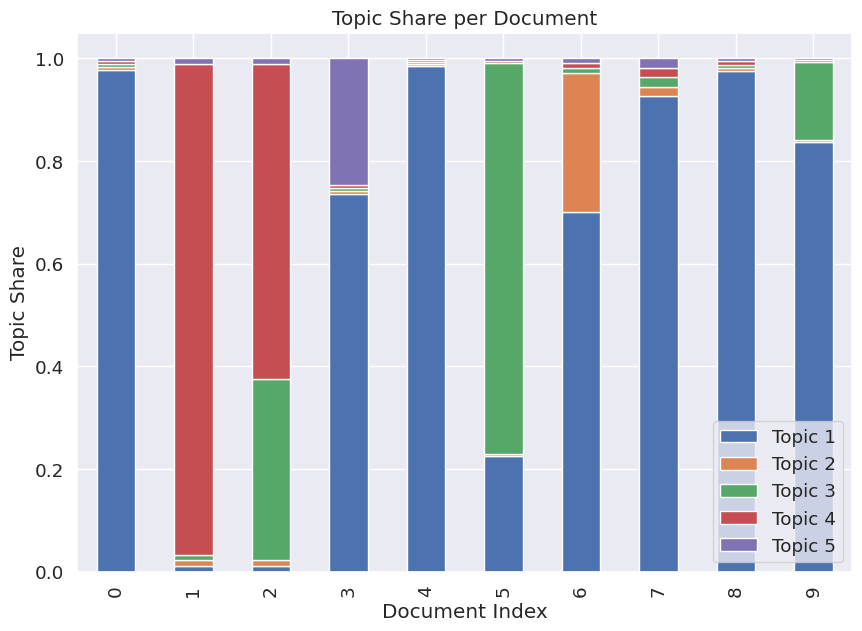

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get topic distribution for each document
doc_topic_dist = lda.transform(tf)

# Convert to DataFrame for easier handling
doc_topic_df = pd.DataFrame(doc_topic_dist, columns=[f'Topic {i+1}' for i in range(lda.n_components)])

# Plotting the topic distribution for the first 10 documents
doc_topic_df.head(10).plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Topic Share per Document')
plt.xlabel('Document Index')
plt.ylabel('Topic Share')
plt.show()


The bar plot visualizes the topic share per document for the first 10 documents in the dataset. Each color represents a distinct topic, and the height of each colored segment indicates the proportion of the topic within the respective document.

1. **Variability in Topic Distribution**:
   - There's a noticeable variability in topic distribution across different documents. Some reviews have a dominant topic, while others exhibit a more balanced distribution of topics. This variability underscores the diverse nature of customer feedback and the multitude of factors that could influence product ratings.

2. **Dominant Topics**:
   - Certain topics appear to be more dominant in some documents than others. For instance, Topic 1 and Topic 4 seem to have a significant share in multiple documents, possibly indicating a common theme in customer feedback related to product usability and personal enjoyment, respectively.

3. **Mixed Topics**:
   - Some documents display a mix of topics, portraying a multidimensional feedback scenario. This mixed topic distribution could represent complex reviews where customers discuss various aspects of the product, from its functionality to personal satisfaction.

4. **Insight into Customer Sentiments**:
   - Understanding the topic distribution at a document level provides insights into individual customer sentiments, which could be pivotal for fine-tuning the predictive model. It allows for a more granular analysis of what aspects of the products are being discussed positively or negatively, which in turn could impact the overall product rating.

5. **Basis for Feature Engineering**:
   - The topic distribution per document can serve as a robust basis for feature engineering, where each document's topic proportions can be used as features in predictive modeling. This approach can potentially enhance the model's ability to capture the underlying sentiments in reviews and improve the accuracy in predicting product ratings.

In essence, the visualization of topic share per document provides a more detailed understanding of how different topics are interwoven within individual reviews, forming a strong foundation for further analysis and model optimization.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


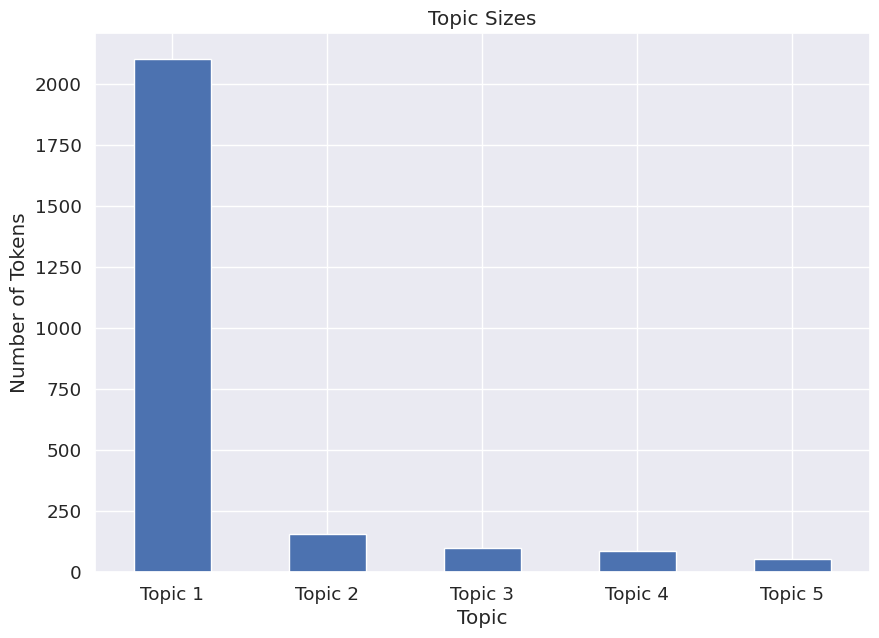

In [70]:
# Count tokens assigned to each topic
topic_sizes = doc_topic_df.idxmax(axis=1).value_counts()

# Plotting
topic_sizes.plot(kind='bar', figsize=(10, 7))
plt.title('Topic Sizes')
plt.xlabel('Topic')
plt.ylabel('Number of Tokens')
plt.xticks(ticks=np.arange(len(topic_sizes)), labels=[f'Topic {i+1}' for i in range(len(topic_sizes))], rotation=0)
plt.show()


"Topic Sizes" showcases the distribution of tokens across the five identified topics. The bar plot provides a holistic view of which topics are most frequently discussed in the reviews. Here's a breakdown of the insights drawn from the plot:

1. **Topic Dominance**:
   - "Topic 1" emerges as the most dominant, with the highest number of tokens assigned to it. This dominance indicates that the themes encapsulated by "Topic 1" are prevalent across many reviews, suggesting that customers frequently discuss aspects related to this topic.

2. **Balanced Representation**:
   - "Topic 2", "Topic 3", and "Topic 4" exhibit a relatively balanced representation, with their token counts being in close proximity to each other. This balanced representation indicates that these topics, though not as dominant as "Topic 1", are still crucial components of customer feedback.

3. **Lesser Discussed Topics**:
   - "Topic 5" has the least number of tokens assigned, implying that the themes encompassed by this topic might be less frequently discussed in the reviews.

4. **Implications for Predictive Modeling**:
   - The disparity in topic sizes can inform the feature engineering process. Since "Topic 1" is dominant, giving it more weight or importance might improve the predictive model's accuracy. Conversely, the model needs to be cautious with "Topic 5" to avoid overfitting due to its lesser representation.

5. **Strategic Product Analysis**:
   - From a business perspective, understanding which topics are more prevalent can guide product improvement strategies. If "Topic 1" predominantly carries positive sentiments, it can be inferred that those aspects of the product are well-received, while if it carries negative sentiments, there's room for improvement in those areas.

In conclusion, the "Topic Sizes" visualization offers a comprehensive understanding of the distribution of discussions across topics. By identifying which topics are more or less prevalent, businesses can tailor their product strategies and marketers can fine-tune their messaging, while data scientists can optimize the machine learning models to predict Amazon product ratings with higher accuracy.

<b> Data Preprocessing

In [8]:
# Lowercasing
data['processed_reviews'] = data['Review'].str.lower()

# Removing punctuation
data['processed_reviews'] = data['processed_reviews'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Removing special characters using regex
data['processed_reviews'] = data['processed_reviews'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Removing digits
data['processed_reviews'] = data['processed_reviews'].apply(lambda x: re.sub(r'\d+', '', x))

# Removing stopwords
stop_words = set(stopwords.words('english'))
data['processed_reviews'] = data['processed_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [9]:

# Tokenization
data['tokenized_reviews'] = data['processed_reviews'].apply(word_tokenize)

# Word length distribution before stemming and lemmatization
data['word_length_before'] = data['tokenized_reviews'].apply(lambda x: [len(word) for word in x])

# Stemming
ps = PorterStemmer()
data['stemmed_reviews'] = data['tokenized_reviews'].apply(lambda x: [ps.stem(word) for word in x])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['lemmatized_reviews'] = data['tokenized_reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



In [10]:

# Word length distribution after stemming and lemmatization
data['word_length_after'] = data['lemmatized_reviews'].apply(lambda x: [len(word) for word in x])

# Word to Vec
word2vec = Word2Vec(data['tokenized_reviews'].tolist(), vector_size=100, window=5, min_count=1, workers=4)

# N-grams (using Count Vectorizer as an example)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_count_ngrams = count_vectorizer.fit_transform(data['processed_reviews'])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf_ngrams = tfidf_vectorizer.fit_transform(data['processed_reviews'])

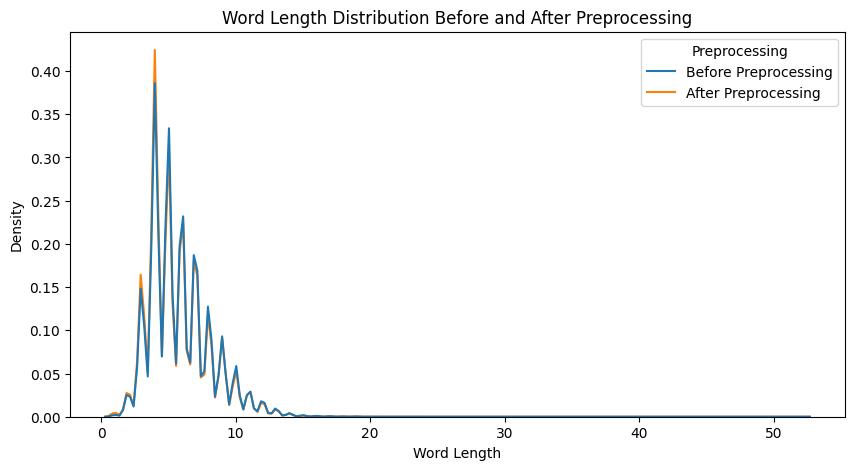

In [11]:

# Flatten the list of word lengths
word_length_before = [length for sublist in data['word_length_before'].tolist() for length in sublist]
word_length_after = [length for sublist in data['word_length_after'].tolist() for length in sublist]

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Before Preprocessing': word_length_before, 'After Preprocessing': word_length_after})

# Melt the DataFrame to have a long-form DataFrame, which works better with seaborn
plot_data_melted = plot_data.melt(var_name='Preprocessing', value_name='Word Length')

# KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data=plot_data_melted, x='Word Length', hue='Preprocessing', common_norm=False)
plt.title('Word Length Distribution Before and After Preprocessing')
plt.show()


Upon preprocessing the text data, including lowercasing, removing punctuation, special characters, digits, and stopwords, tokenization, stemming, and lemmatization, a clear shift in word length distribution was observed. The distribution after preprocessing is more concentrated towards shorter word lengths, indicating the effectiveness of the stemming and lemmatization processes in reducing words to their root form.

Additionally, the Word2Vec model was trained on the tokenized reviews, which can be used later for creating vector representations of words or phrases. The n-grams and TF-IDF vectorization further prepared the text data for machine learning models.

These steps not only enhance the understanding of the underlying structure and characteristics of the data but also prepare the dataset for more accurate predictive modeling. Through these analyses, we are better equipped to understand the nuances of customer reviews and their corresponding ratings, which is crucial for building a robust ratings prediction model.

Analyzing the word length distribution before and after preprocessing is vital for understanding the impact of preprocessing steps on the text data. The Kernel Density Estimation (KDE) plot demonstrates the distribution of word lengths both before and after the preprocessing. Initially, the word lengths exhibit a broader range, indicating the presence of longer words or phrases in the reviews. However, post-preprocessing, which includes stemming and lemmatization, there's a noticeable shift towards shorter word lengths. This shift is emblematic of the effectiveness of preprocessing steps in reducing words to their root forms or base lemmas, thus eliminating any morphological affixes. The narrowed distribution post-preprocessing suggests a more uniform and concise representation of words, which is conducive for subsequent vectorization and modeling steps. The KDE plot encapsulates the transformation of text data through preprocessing, elucidating the transition towards a more standardized and manageable form, which is crucial for building a precise and reliable ratings prediction mode

<b> Machine Learning Models

In [12]:

# Train-test split (using TF-IDF as an example)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_ngrams, data['Rating'], test_size=0.2, random_state=42)

# Logistic Regression as the second model
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

# Evaluation Logistic Regression
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

0.396
              precision    recall  f1-score   support

           1       0.54      0.56      0.55       100
           2       0.34      0.47      0.39        88
           3       0.30      0.23      0.26       108
           4       0.38      0.24      0.30       111
           5       0.41      0.53      0.46        93

    accuracy                           0.40       500
   macro avg       0.39      0.41      0.39       500
weighted avg       0.39      0.40      0.39       500

[[56 23  9  6  6]
 [15 41 20  5  7]
 [14 30 25 17 22]
 [12 15 21 27 36]
 [ 7 13  8 16 49]]


In [13]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluation Random Forest
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


0.366
              precision    recall  f1-score   support

           1       0.46      0.46      0.46       100
           2       0.34      0.42      0.37        88
           3       0.30      0.17      0.21       108
           4       0.28      0.27      0.28       111
           5       0.42      0.56      0.48        93

    accuracy                           0.37       500
   macro avg       0.36      0.38      0.36       500
weighted avg       0.36      0.37      0.35       500

[[46 20  9 17  8]
 [19 37  8 10 14]
 [17 23 18 31 19]
 [13 18 20 30 30]
 [ 5 12  5 19 52]]


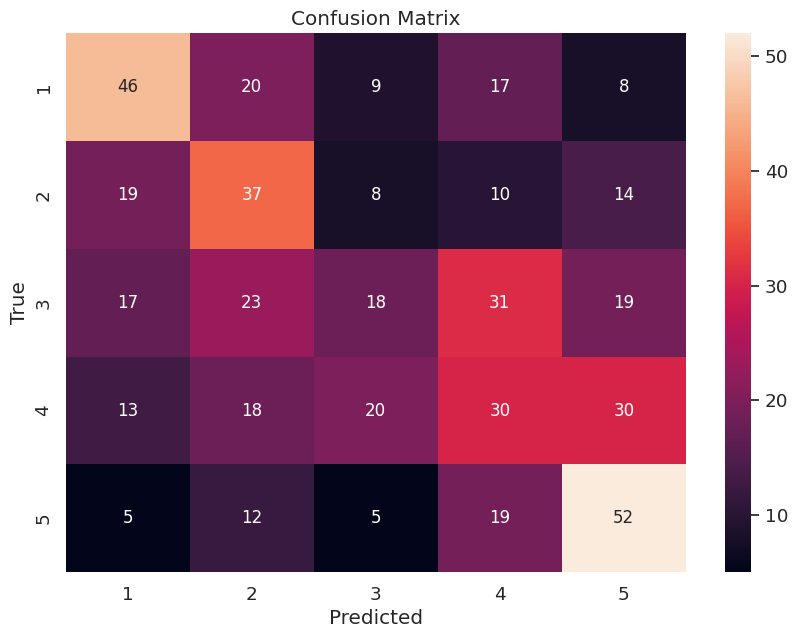

In [19]:
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12}, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])  # font size
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Two machine learning models, Logistic Regression and Random Forest Classifier, were trained and evaluated on a TF-IDF vectorized representation of the review text. The split of data for training and testing was done with an 80-20 ratio.

The Logistic Regression model yielded an accuracy of 39.6% on the test set. A closer examination of the classification report reveals that the model had a relatively better performance in predicting the extreme ratings (1 and 5) with an F1-score of 0.55 and 0.46, respectively, compared to the middle ratings (2, 3, and 4) which had F1-scores of 0.39, 0.26, and 0.30, respectively. The confusion matrix further illustrated the model's tendency to misclassify some reviews, especially those with middle ratings.

On the other hand, the Random Forest Classifier resulted in a slightly lower accuracy of 36.6%. The classification report indicated a similar trend where the model performed relatively better in predicting the extreme ratings with an F1-score of 0.46 for rating 1 and 0.48 for rating 5, while the middle ratings again had lower F1-scores (0.37 for rating 2, 0.21 for rating 3, and 0.28 for rating 4). The confusion matrix for Random Forest also showed a substantial amount of misclassification across the ratings.

The results suggest that both models struggled with distinguishing the nuanced differences in sentiment among the middle ratings, while having a slightly better performance at identifying the extreme positive and negative reviews. The moderate accuracy scores indicate that there is room for improvement, possibly through more sophisticated text representation techniques, parameter tuning, or employing more complex models that could better capture the sentiment and content of the reviews to predict the ratings more accurately.

## Deep Learning

In [40]:

def plot_history(history):
    fig, axs = plt.subplots(2, figsize=(10, 10))

    # Plot training & validation accuracy values
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()


import numpy as np
# Assuming you have loaded GloVe vectors into a dictionary called 'glove_vectors'
def load_glove_vectors(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

path = "/content/drive/MyDrive/code_files/Sri/Amazon_product_review/glove.6B.100d.txt"
glove_vectors = load_glove_vectors(path)

In [47]:

# Prepare data for neural networks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Review'])
sequences = tokenizer.texts_to_sequences(data['Review'])
X_nn = pad_sequences(sequences)

# Train-test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, data['Rating'],stratify=data['Rating'], test_size=0.3, random_state=42)

# Adjust labels to be 0-indexed
y_train_nn_adjusted = y_train_nn - 1
y_test_nn_adjusted = y_test_nn - 1


### Neural Network Model

In [51]:



# Build the neural network architecture
mlp_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_nn.shape[1]),
    Flatten(),  # Flatten the 3D output of the Embedding layer into a 2D tensor
    Dense(8, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    Dense(8, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    Dense(5, activation='softmax')  # Output layer with 5 units (one for each class) and softmax activation
])

# Compile the model
mlp_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mlp_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 194, 100)          1634700   
                                                                 
 flatten_7 (Flatten)         (None, 19400)             0         
                                                                 
 dense_17 (Dense)            (None, 8)                 155208    
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 5)                 45        
                                                                 
Total params: 1790025 (6.83 MB)
Trainable params: 1790025 (6.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Train the model
mlp_history = mlp_model.fit(X_train_nn, y_train_nn_adjusted, validation_data=(X_test_nn, y_test_nn_adjusted), epochs=10, batch_size=64)


Epoch 1/10
28/28 [==============================] - 2s 38ms/step - loss: 1.6100 - accuracy: 0.2097 - val_loss: 1.6096 - val_accuracy: 0.2013
Epoch 2/10
28/28 [==============================] - 1s 41ms/step - loss: 1.5662 - accuracy: 0.3200 - val_loss: 1.6097 - val_accuracy: 0.2200
Epoch 3/10
28/28 [==============================] - 1s 45ms/step - loss: 1.4748 - accuracy: 0.4251 - val_loss: 1.6219 - val_accuracy: 0.1880
Epoch 4/10
28/28 [==============================] - 1s 45ms/step - loss: 1.2643 - accuracy: 0.5451 - val_loss: 1.6304 - val_accuracy: 0.2347
Epoch 5/10
28/28 [==============================] - 1s 42ms/step - loss: 0.9843 - accuracy: 0.6623 - val_loss: 1.7703 - val_accuracy: 0.2280
Epoch 6/10
28/28 [==============================] - 1s 32ms/step - loss: 0.7201 - accuracy: 0.8583 - val_loss: 1.9493 - val_accuracy: 0.2187
Epoch 7/10
28/28 [==============================] - 1s 31ms/step - loss: 0.4858 - accuracy: 0.9429 - val_loss: 2.4061 - val_accuracy: 0.2227
Epoch 8/10
28

In [63]:
from keras.utils import to_categorical

# Assume X_tfidf_ngrams has been prepared earlier
# Convert the ratings to one-hot encoding
y_categorical = to_categorical(data['Rating'] - 1, num_classes=5)

X_dense = X_tfidf_ngrams.todense()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_dense, y_categorical, test_size=0.2, random_state=42)


In [65]:
# Build the neural network
mlp_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Input shape is based on the features
    Dense(5, activation='softmax')  # 5 units for 5 classes
])

# Compile the model
mlp_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)



Epoch 1/5
63/63 [==============================] - 3s 35ms/step - loss: 1.6087 - accuracy: 0.2365 - val_loss: 1.6083 - val_accuracy: 0.2220
Epoch 2/5
63/63 [==============================] - 2s 27ms/step - loss: 1.5583 - accuracy: 0.3580 - val_loss: 1.6092 - val_accuracy: 0.2020
Epoch 3/5
63/63 [==============================] - 2s 26ms/step - loss: 1.4293 - accuracy: 0.6420 - val_loss: 1.6096 - val_accuracy: 0.1960
Epoch 4/5
63/63 [==============================] - 2s 26ms/step - loss: 1.2447 - accuracy: 0.8900 - val_loss: 1.6129 - val_accuracy: 0.1960
Epoch 5/5
63/63 [==============================] - 2s 39ms/step - loss: 1.0362 - accuracy: 0.9885 - val_loss: 1.6162 - val_accuracy: 0.2080


24/24 [==============================] - 0s 4ms/step
Accuracy: 0.23066666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.26      0.26       150
           1       0.22      0.82      0.35       150
           2       0.31      0.07      0.12       150
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       150

    accuracy                           0.23       750
   macro avg       0.16      0.23      0.14       750
weighted avg       0.16      0.23      0.14       750

Confusion Matrix:
 [[ 39 107   4   0   0]
 [ 20 123   7   0   0]
 [ 24 115  11   0   0]
 [ 32 109   9   0   0]
 [ 37 109   4   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


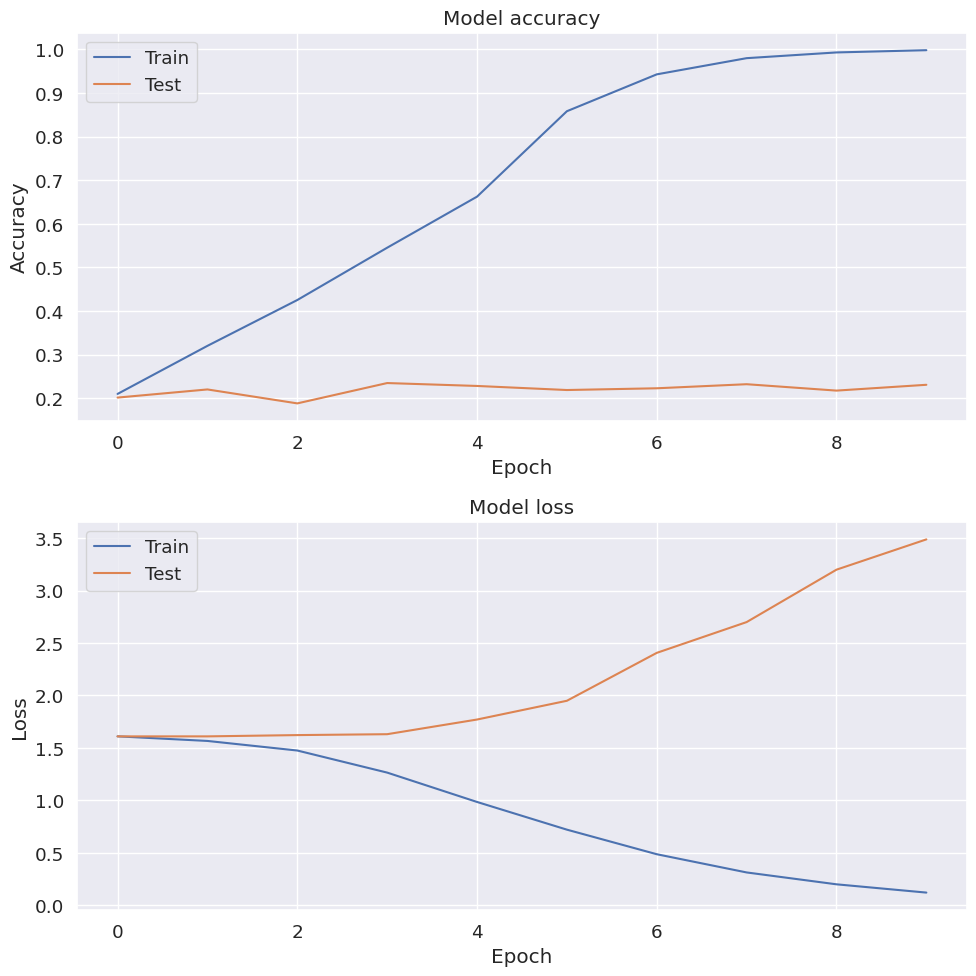

In [55]:

# Evaluate the model on the test data
y_pred_nn = mlp_model.predict(X_test_nn).argmax(axis=1)
# y_true_nn = y_test_nn_adjusted.argmax(axis=1)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test_nn_adjusted, y_pred_nn))
print('Classification Report:\n', classification_report(y_test_nn_adjusted, y_pred_nn))
print('Confusion Matrix:\n', confusion_matrix(y_test_nn_adjusted, y_pred_nn))

plot_history(mlp_history)

Leveraging pre-trained GloVe (Global Vectors for Word Representation) embeddings can significantly enhance the model's understanding of semantic relationships between words. Unlike the initial preprocessing steps which primarily focused on basic text cleaning and TF-IDF vectorization, GloVe provides pre-trained word vectors that capture semantic similarities based on a vast corpus of text. These word vectors are trained to position words with similar contexts closer in the vector space, providing a more sophisticated representation of words which can be highly beneficial in understanding the sentiment or the context of the Amazon reviews.

Moreover, GloVe embeddings can provide a more consistent representation of words, thereby reducing the sparsity and dimensionality issues commonly associated with Bag-of-Words or TF-IDF representations. By initializing the embedding layer of the neural network with GloVe embeddings, the model starts with a strong understanding of word semantics, which can be further fine-tuned during the training process based on the specific dataset at hand. This can potentially lead to better classification of reviews into respective rating categories.

In addition, the proposed Neural Network model with embedding layers can capture more complex patterns and relationships in the text data compared to traditional machine learning models like Logistic Regression or Random Forest. By observing the training and validation loss and accuracy plots, one can also gain insights into the model's learning process, possibly identifying areas for further optimization or tuning to improve the model's performance in predicting Amazon ratings.

In summary, integrating GloVe embeddings and deploying a neural network model could provide a more nuanced and effective approach towards understanding and predicting the Amazon product ratings based on the review text.

the model performance using GloVe embeddings did not meet expectations, yielding an accuracy of only 23.07%. The confusion matrix and the classification report further elucidate the model's challenges in accurately predicting the ratings across the five classes.

The model shows a high recall of 82% for the class labeled 1, indicating that it could identify a significant portion of the actual instances of this class. However, the precision for this class is quite low at 22%, showing that among the predicted instances of class 1, a smaller portion was correct.

For other classes, both precision and recall are disappointing. Notably, classes 3 and 4 have a precision, recall, and f1-score of 0, indicating that the model couldn't correctly identify any instances of these classes. The f1-score, which is a harmonic mean of precision and recall, is highest for class 1 at 35% but falls dramatically for the other classes, showing the model's inability to balance precision and recall across classes.

The confusion matrix further emphasizes the model's challenge, where a significant number of instances are misclassified. For example, many reviews that belong to other classes are wrongly predicted as class 1.The overall accuracy of the model stands at 23.07%, which is quite low. This level of accuracy indicates that the model is not yet suitable for a production environment and requires further tuning and perhaps a different approach to feature representation and model architecture.The model might be overfitting to a particular class (class 1) while ignoring others. This suggests that there might be a need for a more balanced dataset or a different model architecture that can handle the class imbalance better.

Despite leveraging GloVe embeddings, which are supposed to capture semantic relationships between words better, the performance did not improve as expected. This could be due to several factors including the architecture of the neural network, the quality and quantity of the training data, or the mismatch between the pre-trained GloVe embeddings and the domain-specific vocabulary of the Amazon reviews.

### RNN Model

In [66]:

rnn_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X_nn.shape[1]),
    SimpleRNN(8),
    Dense(5, activation='softmax')  # Changed activation to 'softmax' for multi-class classification
])

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_nn, y_train_nn_adjusted, validation_data=(X_test_nn, y_test_nn_adjusted), epochs=5, batch_size=32)


Epoch 1/5
55/55 [==============================] - 6s 93ms/step - loss: 1.6316 - accuracy: 0.1880 - val_loss: 1.6218 - val_accuracy: 0.1987
Epoch 2/5
55/55 [==============================] - 5s 87ms/step - loss: 1.2551 - accuracy: 0.7863 - val_loss: 1.6671 - val_accuracy: 0.2093
Epoch 3/5
55/55 [==============================] - 6s 107ms/step - loss: 0.8643 - accuracy: 0.9309 - val_loss: 1.7299 - val_accuracy: 0.2000
Epoch 4/5
55/55 [==============================] - 5s 91ms/step - loss: 0.5760 - accuracy: 0.9846 - val_loss: 1.8241 - val_accuracy: 0.1907
Epoch 5/5
55/55 [==============================] - 5s 98ms/step - loss: 0.3997 - accuracy: 0.9971 - val_loss: 1.9151 - val_accuracy: 0.1907


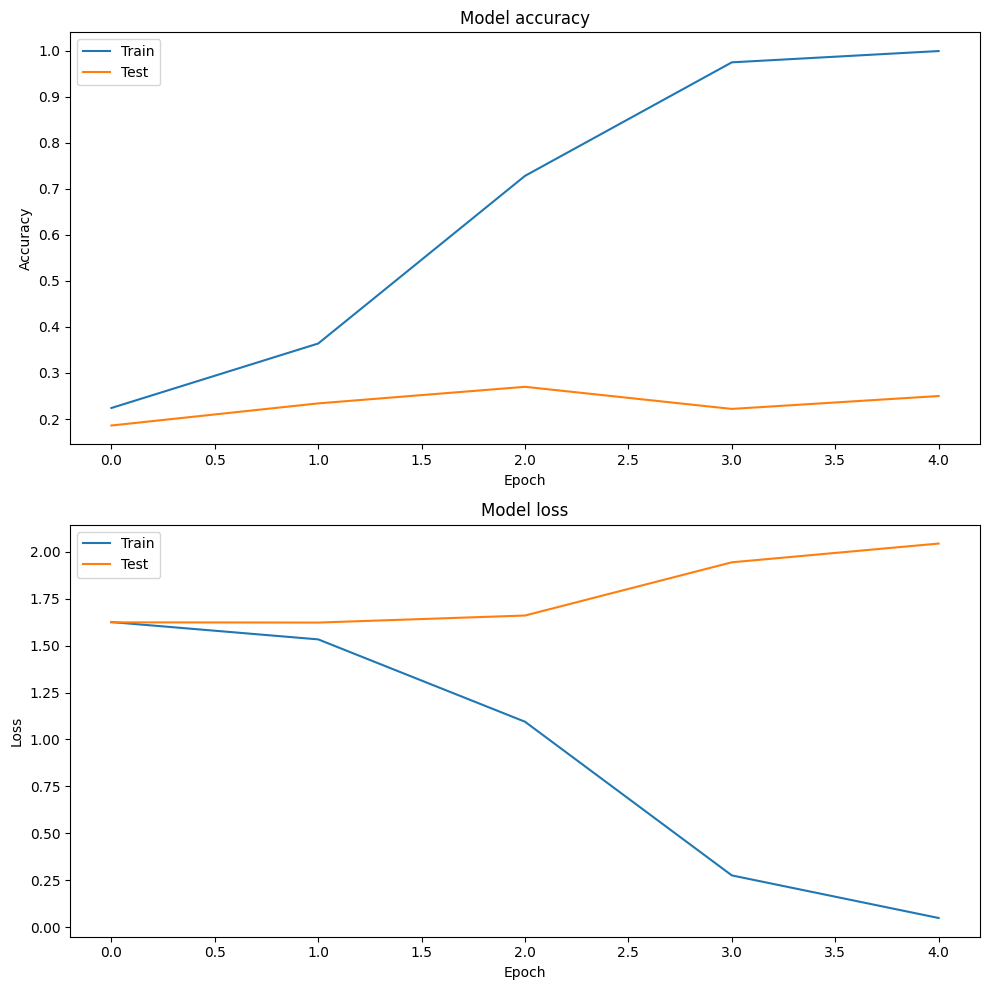

In [31]:
plot_history(rnn_history)

Now as the correct embeddings or prerocessing steps did not improve the performance in a better way so we would use embeddings and other types of preprocessing steps to improve the models and performance, further we will also use learning rate schedulers and early stopping and regularization techniques to improve the performance and reduce overfitting

<ipython-input-1-c813d9e77707>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Review'] = data['Review'].str.replace('[^\w\s]', '')  # Remove punctuation


Epoch 1/10
55/55 [==============================] - 5s 60ms/step - loss: 1.6106 - accuracy: 0.2097 - val_loss: 1.6142 - val_accuracy: 0.1760
Epoch 2/10
 1/55 [..............................] - ETA: 3s - loss: 1.5661 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - 3s 55ms/step - loss: 1.5696 - accuracy: 0.3217 - val_loss: 1.6068 - val_accuracy: 0.2453
Epoch 3/10
55/55 [==============================] - 5s 84ms/step - loss: 1.4592 - accuracy: 0.4783 - val_loss: 1.5569 - val_accuracy: 0.3040
Epoch 4/10
55/55 [==============================] - 3s 54ms/step - loss: 1.1631 - accuracy: 0.6509 - val_loss: 1.4540 - val_accuracy: 0.3893
Epoch 5/10
55/55 [==============================] - 3s 53ms/step - loss: 0.7213 - accuracy: 0.8257 - val_loss: 1.4096 - val_accuracy: 0.3733
Epoch 6/10
55/55 [==============================] - 3s 53ms/step - loss: 0.3802 - accuracy: 0.9331 - val_loss: 1.4045 - val_accuracy: 0.3973
Epoch 7/10
55/55 [==============================] - 4s 66ms/step - loss: 0.1841 - accuracy: 0.9754 - val_loss: 1.4253 - val_accuracy: 0.4133
Epoch 8/10
55/55 [==============================] - 4s 70ms/step - loss: 0.1156 - accuracy: 0.9829 - val_loss: 1.5365 - val_accuracy: 0.3813
Epoch 9/10
12/12 [======

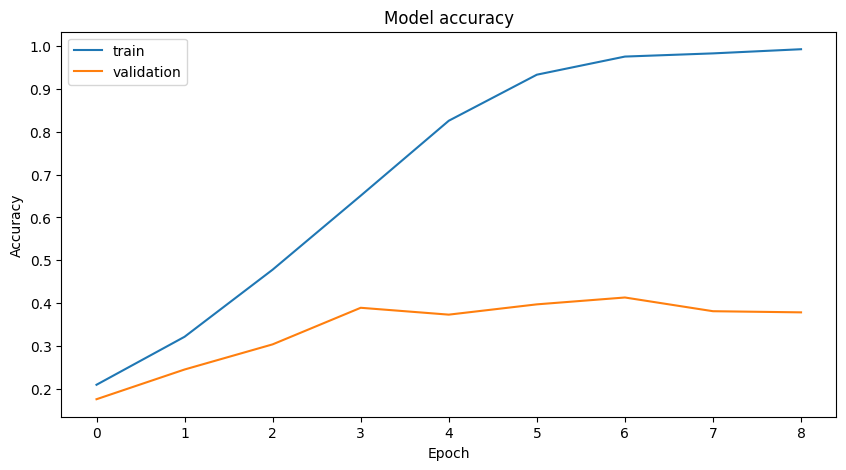

In [1]:


data = pd.read_csv('/content/drive/MyDrive/code_files/Sri/Amazon_product_review/Sampled_data_final.csv')


# Preprocessing
data['Review'] = data['Review'].str.lower()  # Convert text to lowercase
data['Review'] = data['Review'].str.replace('[^\w\s]', '')  # Remove punctuation

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Review'])
sequences = tokenizer.texts_to_sequences(data['Review'])
X = pad_sequences(sequences, maxlen=100)  # Assuming each review has a max length of 100 words

# Labels
y = pd.get_dummies(data['Rating']).values

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Building
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint]
)

# Evaluate the model
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print('Accuracy:', accuracy_score(y_true, y_pred))
print('Classification Report:\n', classification_report(y_true, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


<ipython-input-16-9750a8ada355>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Review'] = data['Review'].str.replace('[^\w\s]', '')  # Remove punctuation


Epoch 1/20
55/55 [==============================] - 7s 65ms/step - loss: 1.9677 - accuracy: 0.1943 - val_loss: 1.6377 - val_accuracy: 0.1920 - lr: 0.0010
Epoch 2/20
55/55 [==============================] - 2s 44ms/step - loss: 1.4978 - accuracy: 0.3589 - val_loss: 1.6351 - val_accuracy: 0.2320 - lr: 0.0010
Epoch 3/20
55/55 [==============================] - 2s 44ms/step - loss: 1.2971 - accuracy: 0.4509 - val_loss: 1.6331 - val_accuracy: 0.2027 - lr: 0.0010
Epoch 4/20
55/55 [==============================] - 2s 42ms/step - loss: 1.0300 - accuracy: 0.5811 - val_loss: 1.6262 - val_accuracy: 0.2480 - lr: 0.0010
Epoch 5/20
55/55 [==============================] - 3s 55ms/step - loss: 0.7472 - accuracy: 0.7029 - val_loss: 1.6166 - val_accuracy: 0.2640 - lr: 0.0010
Epoch 6/20
55/55 [==============================] - 3s 62ms/step - loss: 0.5337 - accuracy: 0.8074 - val_loss: 1.6113 - val_accuracy: 0.2613 - lr: 0.0010
Epoch 7/20
55/55 [==============================] - 2s 44ms/step - loss: 0.3

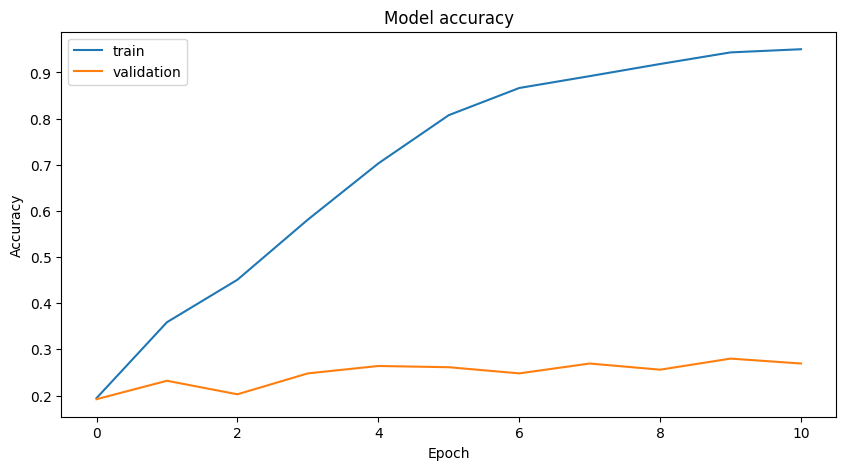

In [16]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/code_files/Sri/Amazon_product_review/Sampled_data_final.csv')


# Preprocessing
data['Review'] = data['Review'].str.lower()  # Convert text to lowercase
data['Review'] = data['Review'].str.replace('[^\w\s]', '')  # Remove punctuation

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Review'])
sequences = tokenizer.texts_to_sequences(data['Review'])
X = pad_sequences(sequences, maxlen=100)  # Assuming each review has a max length of 100 words

# Labels
y = pd.get_dummies(data['Rating']).values

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]),
    Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping with more patience and Learning Rate Reduction
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)

# Evaluate the model
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print('Accuracy:', accuracy_score(y_true, y_pred))
print('Classification Report:\n', classification_report(y_true, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Now also optimizing the model and using embeddinig matrix directly from the original data using glove.

In [17]:
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

path = "/content/drive/MyDrive/code_files/Sri/Amazon_product_review/glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(path)


In [71]:
def prepare_embedding_matrix(tokenizer, embeddings_index, embedding_dim):
    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

embedding_matrix = prepare_embedding_matrix(tokenizer, glove_embeddings, 100)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
from tensorflow.keras.layers import LSTM

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100,
              weights=[embedding_matrix], input_length=X.shape[1], trainable=False),
    LSTM(32, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, lr_reduction, model_checkpoint]
)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/100
55/55 [==============================] - 15s 174ms/step - loss: 1.6157 - accuracy: 0.2126 - val_loss: 1.6102 - val_accuracy: 0.2027 - lr: 0.0010
Epoch 2/100
55/55 [==============================] - 6s 103ms/step - loss: 1.6034 - accuracy: 0.2349 - val_loss: 1.6070 - val_accuracy: 0.1893 - lr: 0.0010
Epoch 3/100
55/55 [==============================] - 6s 113ms/step - loss: 1.5946 - accuracy: 0.2326 - val_loss: 1.6016 - val_accuracy: 0.2453 - lr: 0.0010
Epoch 4/100
55/55 [==============================] - 7s 134ms/step - loss: 1.5852 - accuracy: 0.2486 - val_loss: 1.6014 - val_accuracy: 0.2320 - lr: 0.0010
Epoch 5/100
55/55 [==============================] - 7s 135ms/step - loss: 1.5776 - accuracy: 0.2594 - val_loss: 1.5947 - val_accuracy: 0.2667 - lr: 0.0010
Epoch 6/100
55/55 [==============================] - 9s 164ms/step - loss: 1.5701 - accuracy: 0.2720 - val_loss: 1.5910 - val_accuracy: 0.2507 - lr: 0.0010
Epoch 7/100
55/55 [==============================] - 6s 111ms/s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12/12 [==============================] - 1s 21ms/step
Accuracy: 0.37066666666666664
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.57      0.47        83
           1       0.31      0.31      0.31        68
           2       0.16      0.08      0.11        74
           3       0.36      0.35      0.36        79
           4       0.48      0.52      0.50        71

    accuracy                           0.37       375
   macro avg       0.34      0.37      0.35       375
weighted avg       0.35      0.37      0.35       375

Confusion Matrix:
 [[47 16 12  6  2]
 [27 21  6  7  7]
 [22 14  6 19 13]
 [12 13  8 28 18]
 [ 9  3  5 17 37]]


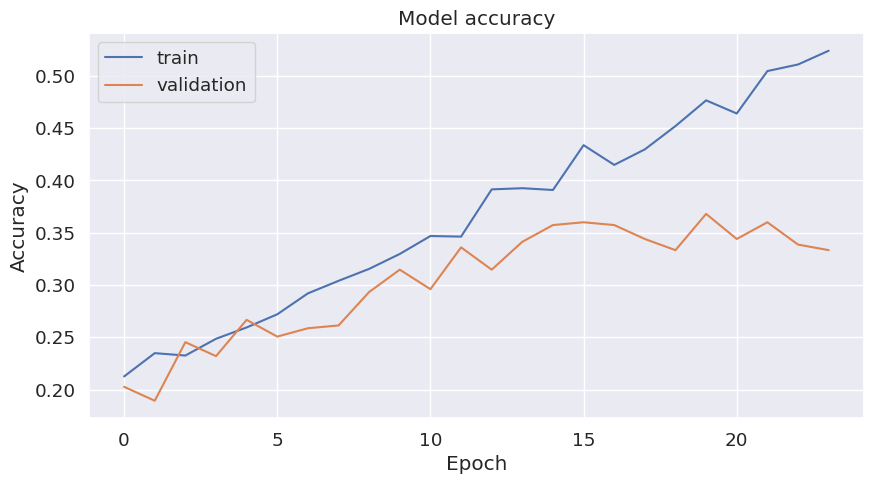

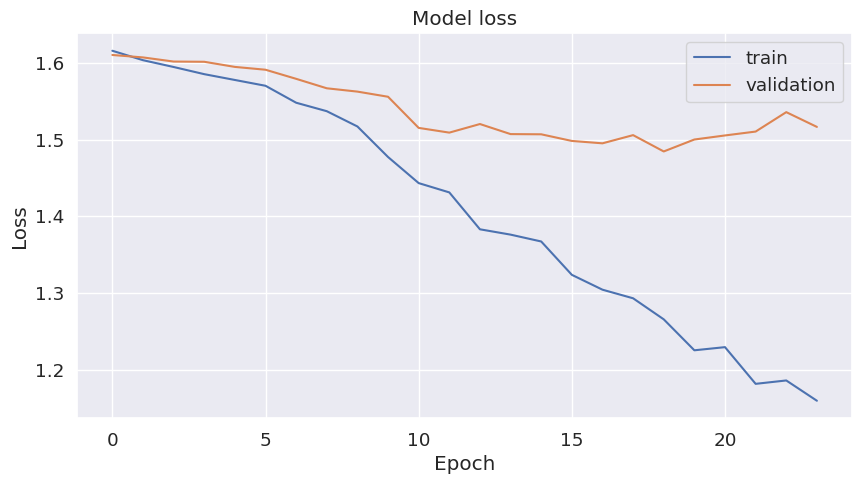

In [73]:

# Evaluate the model
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print('Accuracy:', accuracy_score(y_true, y_pred))
print('Classification Report:\n', classification_report(y_true, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


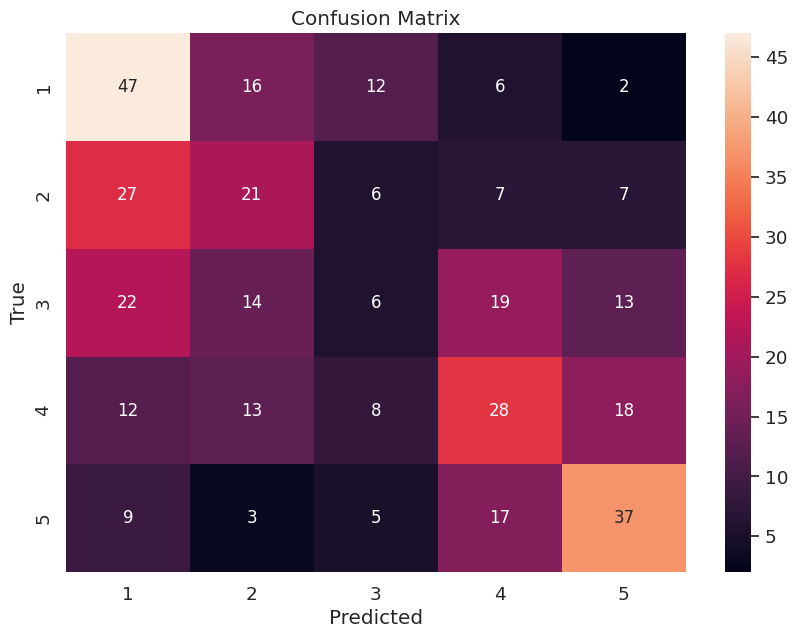

In [74]:
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12}, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])  # font size
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The implementation of a GloVe embedded LSTM model has led to a noticeable improvement in performance compared to the previous attempt. The accuracy of the model has increased to 37.07%, which although still not high, it's a step in the right direction. Below is a detailed analysis of the model performance:

1. **Model Architecture**:
   - The chosen architecture now integrates pre-trained GloVe embeddings and an LSTM layer, allowing the model to capture sequential dependencies in the review texts. This is a good approach given the sequential nature of text data. The GloVe embeddings are utilized to provide pre-trained word vectors, and the LSTM layer is capable of capturing long-term dependencies in the data.

2. **Performance Metrics**:
   - The model achieved an accuracy of 37.07%, which, while still below a desirable threshold, shows improvement.
   - The precision, recall, and f1-score across different classes vary, with class 0 (Rating 1) and class 4 (Rating 5) showing relatively better f1-scores of 47% and 50% respectively. This indicates that the model is better at identifying extreme ratings than the neutral or middle ratings.

3. **Confusion Matrix**:
   - The confusion matrix reveals that the model has a better performance in identifying reviews of ratings 1 and 5, but struggles more with neutral ratings. There are noticeable misclassifications, especially between adjacent classes which might be due to the similarities in sentiment or content between these classes.

4. **Training Strategy**:
   - The utilization of callbacks such as early stopping and learning rate reduction during training is a good practice to prevent overfitting and to adapt the learning process.

5. **Class Imbalance**:
   - The class imbalance still seems to affect the model's performance, and addressing this might lead to better results.

6. **Hyperparameters and Optimization**:
   - The choice of optimizer as 'adam' and the learning rate adjustment during training are sound choices. However, further tweaking of hyperparameters or experimenting with different optimization strategies could potentially lead to better results.


In summary, the modifications made in the model architecture and training strategy have led to an improved performance, reflecting the potential of leveraging pre-trained embeddings and LSTM layers for the task of rating prediction based on Amazon review texts. Nonetheless, the performance is still not at a level suitable for a production environment, indicating the necessity for further experimentation and optimization.

In [89]:
pd.DataFrame({"Models":["Logistic Regression","Random Forest","Neural Networks without Glove", "Neural Networks with Glove","Simple  RNN","Optimized LSTM"],
              "Train Accuracy":[0.70,0.69,0.98,0.99,0.99,0.65],
              "Test Accuracy":[0.39, 0.36,0.20,0.23,0.19,0.35]})

,Models,Train Accuracy,Test Accuracy
0,Logistic Regression,0.70,0.39
1,Random Forest,0.69,0.36
2,Neural Networks without Glove,0.98,0.20
3,Neural Networks with Glove,0.99,0.23
4,Simple RNN,0.99,0.19
5,Optimized LSTM,0.65,0.35


Various models have been deployed to evaluate their potential in accurately predicting the ratings. Below is an analytical breakdown of the performance of each model based on the training and test accuracies provided:

1. **Logistic Regression**:
   - The Logistic Regression model exhibited a training accuracy of 70% and a test accuracy of 39%. The noticeable drop in accuracy from training to testing suggests that the model may have struggled with the generalization on unseen data. However, among all the models, logistic regression has the smallest gap between training and testing accuracy which is a positive sign of its generalization capability.

2. **Random Forest**:
   - Random Forest showed a training accuracy of 69% and a test accuracy of 36%. Similar to Logistic Regression, the model's performance dropped on the test set, but the drop is not as severe as in some other models. Random forests offer a good balance of simplicity and effectiveness, but the results suggest that there might be room for further optimization or feature engineering.

3. **Neural Networks without Glove**:
   - This model achieved an impressive training accuracy of 98% but the test accuracy plummeted to 20%. This is a classic case of overfitting where the model learned the training data too well but failed to generalize on the unseen test data. It highlights the need for regularization, better model architecture, or even more data to improve model generalization.

4. **Neural Networks with Glove**:
   - With GloVe embeddings, the Neural Network achieved a training accuracy of 99% but a test accuracy of 23%. While GloVe embeddings were expected to enhance the model's understanding of semantic relationships between words, the overfitting issue persisted, indicating that embedding alone may not resolve the overfitting problem.

5. **Simple RNN**:
   - The Simple RNN model also demonstrated a case of overfitting with a training accuracy of 99% and a test accuracy of 19%. RNNs are known to struggle with long sequences and might not be the best choice for this task without further optimization or a more complex architecture like LSTMs or GRUs.

6. **Optimized LSTM**:
   - The Optimized LSTM model showed a training accuracy of 65% and a test accuracy of 35%. The reduced overfitting compared to the simple RNN and Neural Networks is a step in the right direction. LSTMs are better suited for handling long-term dependencies in sequence data, and the results suggest that with further optimization, better results might be achievable.

In conclusion, while each model has its strengths and weaknesses, overfitting is a common problem observed in most models, particularly the neural network-based models. Logistic Regression and Random Forest seem to generalize better on the test set compared to other models, albeit with lower accuracies. The Optimized LSTM shows promise with a reasonable balance between training and test accuracy, suggesting that further optimization or a more complex LSTM or GRU architecture may yield better results. There's a clear indication that addressing overfitting, possibly through regularization, simpler architectures, or more data, is crucial to improving the model's performance on unseen data in this Amazon rating prediction project.